<a href="https://colab.research.google.com/github/jadhav-rakesh/FashionMNIST/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt

In [106]:
import tensorflow_datasets as tfds

dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train_data, test_data = dataset["train"], dataset["test"]

In [107]:
class_names = metadata.features["label"].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [108]:
num_train_examples = metadata.splits["train"].num_examples
num_train_examples

60000

In [109]:
num_test_examples = metadata.splits["test"].num_examples
num_test_examples

10000

In [110]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_data.map(normalize)
test_dataset = test_data.map(normalize)

train_data = train_dataset.cache()
test_data = test_dataset.cache()

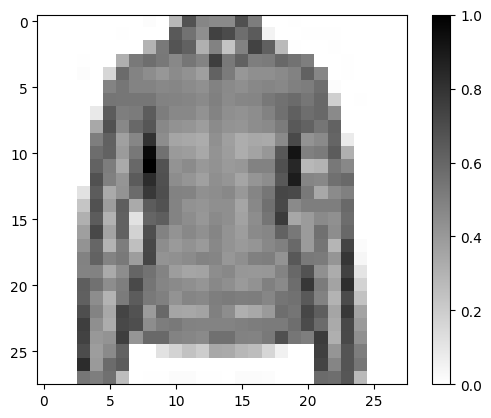

In [73]:
for image, label in test_data.take(1):
    break
image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

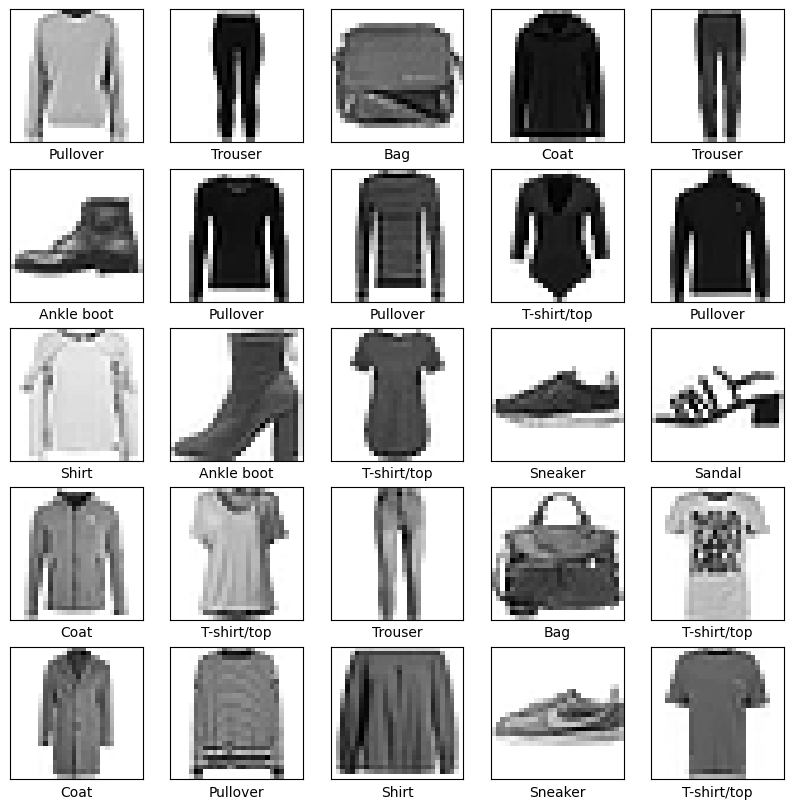

In [74]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(25)):
    image = image.numpy().reshape((28, 28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])


In [111]:
BATCH_SIZE = 32
train_data = train_data.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_data = test_data.cache().batch(BATCH_SIZE)


In [78]:
model.fit(train_data, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7776 - loss: 0.6394
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8576 - loss: 0.3942
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8749 - loss: 0.3432
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8841 - loss: 0.3194
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8906 - loss: 0.2961


In [79]:
test_loss, test_accuracy = model.evaluate(test_data, steps=math.ceil(num_test_examples/32))
print("Accuracy on test dataset:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8793 - loss: 0.3435
Accuracy on test dataset: 0.8743000030517578


In [80]:
for test_images, test_labels in test_data.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [81]:
predictions.shape

(32, 10)

In [82]:
predictions[0]

array([2.5305348e-05, 2.5838815e-06, 6.6797812e-03, 1.3609881e-06,
       9.6296424e-01, 6.3141159e-09, 3.0265128e-02, 1.1416542e-08,
       6.1317347e-05, 1.8663299e-07], dtype=float32)

In [83]:
np.argmax(predictions[0])

4

In [84]:
test_labels[0]

4

In [85]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

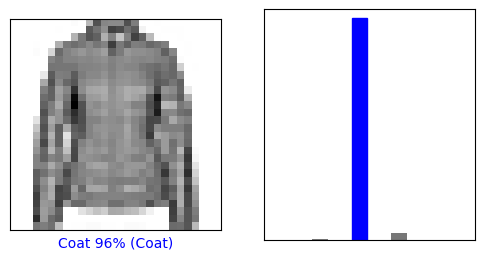

In [86]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

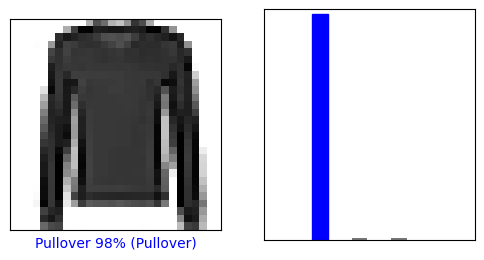

In [87]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

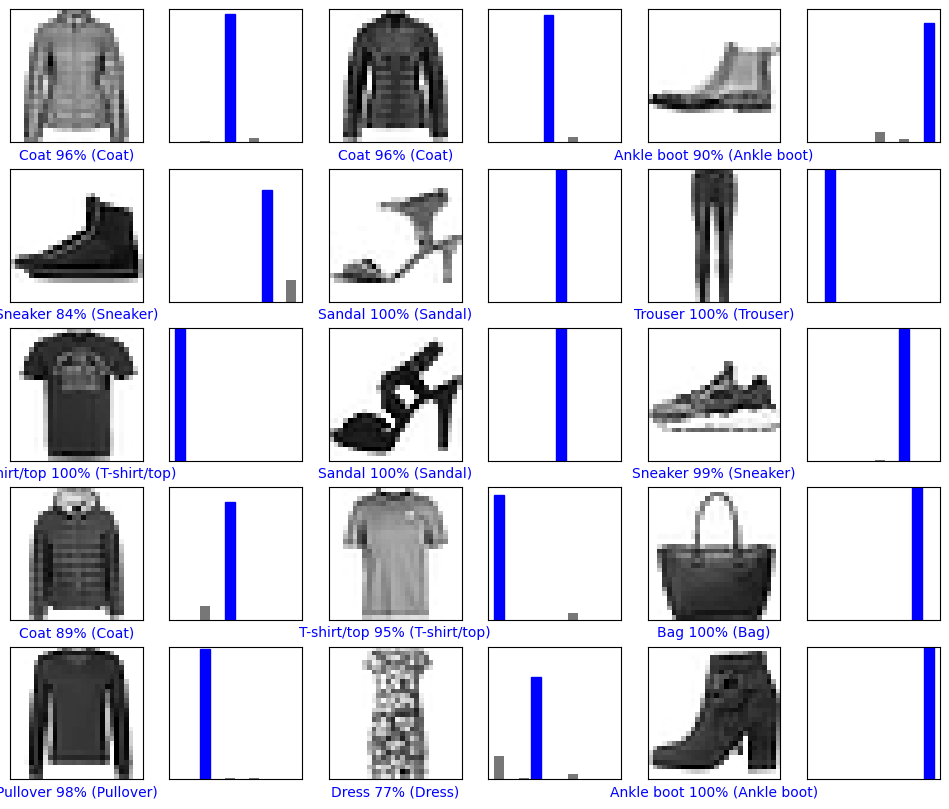

In [88]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [89]:
img = test_images[0]
img.shape

(28, 28, 1)

In [90]:
img = np.array([img])
img.shape

(1, 28, 28, 1)

In [91]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
[[2.5305280e-05 2.5838772e-06 6.6797724e-03 1.3609882e-06 9.6296436e-01
  6.3140924e-09 3.0265074e-02 1.1416521e-08 6.1317347e-05 1.8663249e-07]]


In [92]:
np.argmax(predictions_single[0])

4

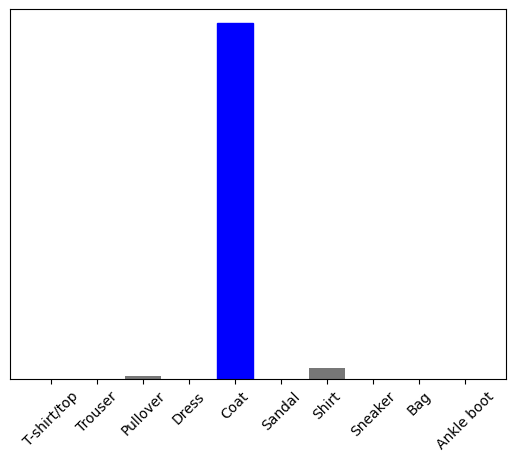

In [93]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

#Using Convolutional Neural Networks

In [112]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [113]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [114]:
model.fit(train_data, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.8043 - loss: 0.5385
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9046 - loss: 0.2654
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9205 - loss: 0.2175
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.9304 - loss: 0.1876
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.9400 - loss: 0.1608
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9490 - loss: 0.1348
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9567 - loss: 0.1161
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9644 - loss: 0.0953
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9710 - loss: 0.0780
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9730 - loss: 0.0727


In [115]:
test_loss, test_accuracy = model.evaluate(test_data, steps=math.ceil(num_test_examples/BATCH_SIZE))
test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9096 - loss: 0.3439


0.9114000201225281